<a href="https://colab.research.google.com/github/ivxsm/KAUST-Learning/blob/main/day1_Linear_Regression_Basics_(Unsolved).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression Basics

<a id="Notebook-Overview"></a>
# Introduction

This notebook provides a comprehensive walkthrough of linear regression, focusing on both theoretical and practical aspects. It includes:

- Implementing a linear regression model from scratch using `NumPy`.
- Using `Scikit-Learn`'s API to achieve the same.
- Extending the concept to fit more complex functions with higher-order polynomials.

## Tasks Covered:

1. Implement 1 polynomial degree Linear Regression model from scratch (using `numpy`).
2. Implement the same model using `sklearn`.
3. Take a complex function and try fitting a multi-polynomial degree Linear regression model on it.

### You Need to Know:

1. **`numpy`** (for implementation)
2. A little bit of **`matplotlib`** (for visualization).

### Good to Have Knowledge of:

1. **`sklearn`** (details of the functions are provided anyway).

---

## Table of Contents

1. [Introduction](#Notebook-Overview)
2. [Installation and Import of Libraries](#Installation-Import)
3. [Linear Regression from Scratch](#Linear-Regression-Scratch)
    - [Dataset Creation](#Dataset-Creation)
    - [Model Implementation](#Model-Implementation)
4. [Linear Regression using Scikit-Learn](#Linear-Regression-Sklearn)
5. [Fitting Complex Functions](#Fitting-Complex-Functions)
    - [Creating Complex Data](#Creating-Complex-Data)
    - [Custom Fit with Variable Bases](#Custom-Fit-Bases)
6. [Summary](#Summary)

---

<a id="Installation-Import"></a>
# Installation and Import of Libraries

Before we begin, let’s ensure all necessary libraries are installed. Each library is essential for specific tasks in this notebook:

- **NumPy**: For numerical operations and array manipulations.
- **Matplotlib**: To create visualizations.
- **Scikit-learn**: Provides machine learning algorithms and tools.

In [ ]:
# Install necessary libraries

## Uncomment the following lines if running in a new environment
%pip install numpy
%pip install scikit-learn
%pip install matplotlib

from IPython.display import clear_output  # Clears notebook output for a clean interface
clear_output()  # Clears the output to avoid clutter.

### Importing Libraries

In [ ]:
# Import required libraries
import math  # For mathematical operations

import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For visualization

from sklearn.linear_model import LinearRegression  # For linear regression using `Scikit-Learn`

<a id="Linear-Regression-Scratch"></a>
# Linear Regression from Scratch

<a id="Dataset-Creation"></a>
## Dataset Creation

This section creates a dataset using a simple linear equation with added noise to simulate real-world data.

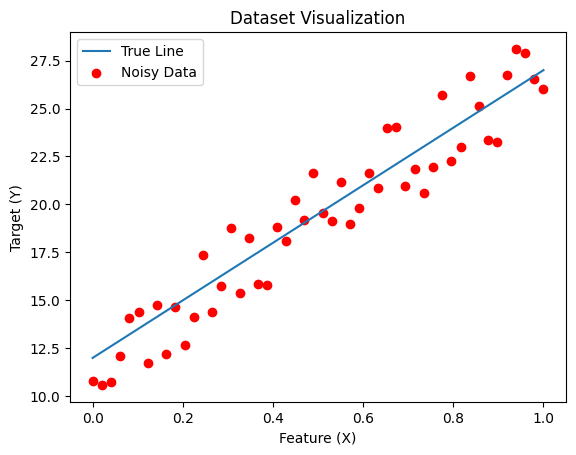

In [ ]:
# Let's make some custom points (which would act as our dataset)
# Starting with a function with highest polynomial degree of 1

# y = w0 + w1*x1

w0 = 12  # Bias term
w1 = 15  # Coefficient for the feature
noise_scale = 5  # Scale of random noise: the higher this is, the rougher and farther the noisy output is from the best fit line
num_points = 50  # Number of data points

# Generate feature and target data
x_points = np.linspace(0, 1, num_points)  # Equally spaced points between 0 and 1
y_actual = w0 + w1 * x_points  # True values without noise
noise = noise_scale * (np.random.rand(num_points) - 0.5)  # Random noise in `[-2.5, 2.5]`
y_noisy = y_actual + noise  # Add noise to the true values

# Plot the dataset
plt.plot(x_points, y_actual, label='True Line')  # Plot the true line
plt.scatter(x_points, y_noisy, label='Noisy Data', color='red')  # Scatter plot for noisy data
plt.xlabel('Feature (X)')  # Label for x-axis
plt.ylabel('Target (Y)')  # Label for y-axis
plt.legend()  # Add a legend
plt.title('Dataset Visualization')  # Title of the plot
plt.show()  # Display the plot

### Explanation:

```python
noise_scale = 5
noise = noise_scale * (np.random.rand(num_points) - 0.5)
y_noisy = y_actual + noise
```

- `np.random.rand(num_points)` generates an array of random values in range `[0, 1)` of the same shape as `y_actual`.
- We subtract `0.5` from it to bring it to range `[-0.5, 0.5)` (so there are also some values below the line after noise is added).
- It might be possible that the values of `w0`, `w1`, or `y_actual` are large enough that noise in the range `[-0.5, 0.5)` doesn’t significantly affect the data (e.g., if a label is 1000, adding/subtracting 0.5 may not be noticeable). To address this, we scale the noise using the `noise_scale` factor.
- The calculated noise is added to the noise-free values in `y_actual` to generate the noisy dataset.

<a id="Model-Implementation"></a>
## Model Implementation

Here, we implement linear regression using the normal equation. The steps and mathematical formulation are as follows:

### Steps in Math:

1. Represent the data in matrix form:

   $$
   X = \begin{bmatrix}
   1 & x_1 \\
   1 & x_2 \\
   \vdots & \vdots \\
   1 & x_n
   \end{bmatrix}, \quad y = \begin{bmatrix}
   y_1 \\
   y_2 \\
   \vdots \\
   y_n
   \end{bmatrix}
   $$

2. Derive the normal equation:

   - The linear regression model assumes the following relationship:
     
     $$
     y = Xw + \epsilon
     $$

     Here:
     - \(y\) is the vector of observed outputs.
     - \(X\) is the design matrix (including a bias term as the first column).
     - \(w\) is the vector of weights we aim to compute.
     - \($\epsilon$\) is the vector of residual errors.

   - To find the best weights \(w\), we minimize the sum of squared errors (SSE):
     
     $$
     SSE = \|\epsilon\|^2 = \|y - Xw\|^2
     $$

   - Expanding the square:

     $$
     SSE = (y - Xw)^T (y - Xw)
     $$

   - Simplify the equation using matrix properties:
     
     $$
     SSE = y^T y - 2w^T X^T y + w^T X^T X w
     $$

   - Take the derivative of \(SSE\) with respect to \(w\) and set it to zero to minimize:
     
     $$
     \frac{\partial SSE}{\partial w} = -2X^T y + 2X^T X w = 0
     $$

   - Solve for \(w\):
     
     $$
     X^T X w = X^T y
     $$

   - Multiply both sides by \((X^T X)^{-1}\) (assuming \(X^T X\) is invertible):

     $$
     w = (X^T X)^{-1} X^T y
     $$

3. Use the weights \(w\) to predict the values \(y_{pred}\):

   $$
   y_{pred} = X w
   $$

### Code Implementation:

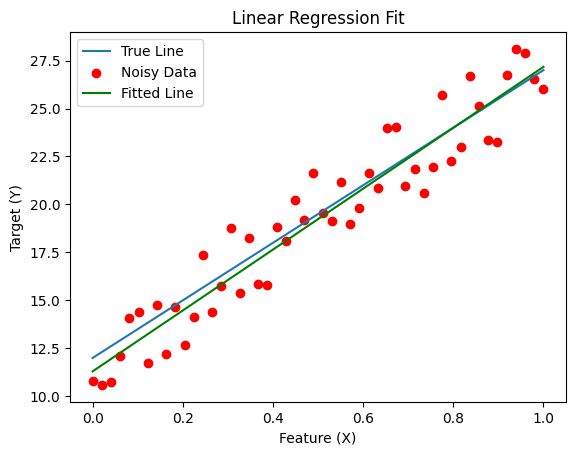

True weights: Bias = 12, Coefficient = 15
Calculated weights: Bias = 11.30, Coefficient = 15.87


In [ ]:
# Step 1: Prepare the design matrix
X = np.vstack((np.ones(num_points), x_points)).T  # Add bias term as the first column

# Step 2: Calculate weights using the normal equation
# hint: use np.linalg.inv for to get the inverse of a matrix.
# hint: use matrix.T to transpose a matrix matrix.

# `w = (X^T * X)^-1 * X^T * y`
w = np.linalg.inv(?? @ ??) @ ?? @ ??  # Solve for weights using normal equation

# Step 3: Generate predictions
y_pred = X @ w  # Predicted values using the calculated weights

# Plot the results
plt.plot(x_points, y_actual, label='True Line')  # Plot the true line
plt.scatter(x_points, y_noisy, label='Noisy Data', color='red')  # Scatter plot for noisy data
plt.plot(x_points, y_pred, label='Fitted Line', color='green')  # Plot the fitted line
plt.xlabel('Feature (X)')  # Label for x-axis
plt.ylabel('Target (Y)')  # Label for y-axis
plt.legend()  # Add a legend
plt.title('Linear Regression Fit')  # Title of the plot
plt.show()  # Display the plot

# Print the actual and predicted weights
print(f'True weights: Bias = {w0}, Coefficient = {w1}')  # Print the true weights
print(f'Calculated weights: Bias = {w[0]:.2f}, Coefficient = {w[1]:.2f}')  # Print the calculated weights

---

<a id="Linear-Regression-Sklearn"></a>
# Linear Regression using Scikit-Learn

This section demonstrates how to use `Scikit-Learn`'s `LinearRegression` API.

Let's do the same as before but using `Scikit-Learn` this time.

In [ ]:
# Initialize and fit the model
model = LinearRegression()  # Create an instance of `LinearRegression`
model.fit(??.reshape(-1, 1), ??)  # Reshape `x_points` to a 2D array and fit the model

LinearRegression()

In [ ]:
# Make predictions
y_pred_sklearn = model.predict(??.reshape(-1, 1))  # Predict using the trained model

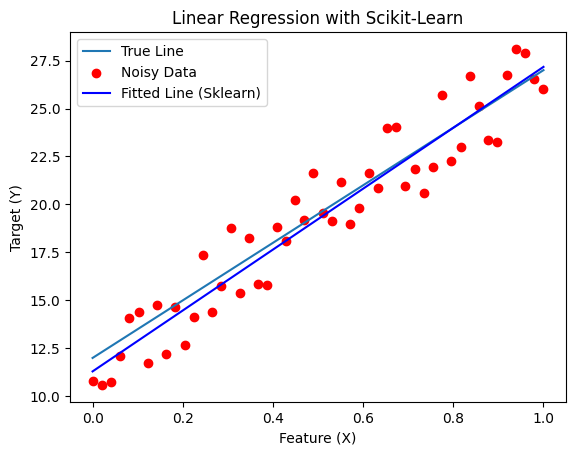

Actual Weights: Bias = 12, Coefficient = 15
Sklearn Predicted Weights: Bias = 11.30, Coefficient = 15.87


In [ ]:
# Plot the results
plt.plot(x_points, y_actual, label='True Line')  # Plot the true line
plt.scatter(x_points, y_noisy, label='Noisy Data', color='red')  # Scatter plot for noisy data
plt.plot(x_points, y_pred_sklearn, label='Fitted Line (Sklearn)', color='blue')  # Plot the sklearn fitted line
plt.xlabel('Feature (X)')  # Label for x-axis
plt.ylabel('Target (Y)')  # Label for y-axis
plt.legend()  # Add a legend
plt.title('Linear Regression with Scikit-Learn')  # Title of the plot
plt.show()  # Display the plot

# Print the actual and predicted weights
print(f'Actual Weights: Bias = {w0}, Coefficient = {w1}')  # Print actual weights
print(f'Sklearn Predicted Weights: Bias = {model.intercept_:.2f}, Coefficient = {model.coef_[0]:.2f}')  # Print sklearn weights

### Explanation:

1. **Model Initialization:**
   - `LinearRegression()` creates a new instance of the linear regression model. This instance can be customized with additional parameters if needed.

2. **Fitting the Model:**
   - `model.fit(x_points.reshape(-1, 1), y_noisy)` trains the model by finding the best-fit line for the provided data.
   - `x_points.reshape(-1, 1)` ensures the feature input has the correct 2D shape `(num_samples, num_features)` expected by Scikit-Learn.
   - The target values (`y_noisy`) are used to calculate the best-fit weights.

3. **Making Predictions:**
   - `model.predict(x_points.reshape(-1, 1))` uses the trained model to predict target values for the given features.
   - These predictions are the `y_pred_sklearn` values plotted in blue.

4. **Weights and Intercept:**
   - `model.intercept_` represents the bias (intercept of the line).
   - `model.coef_` represents the slope (coefficient for the feature).

### Key Notes:

- This method leverages optimized numerical computations provided by Scikit-Learn.
- The results are similar to those obtained using the manual implementation of the normal equation.
- Scikit-Learn simplifies the process by abstracting the mathematical operations.

---

<a id="Fitting-Complex-Functions"></a>
# Fitting Complex Functions

<a id="Creating-Complex-Data"></a>
## Creating Complex Data

In this section, we create a sinusoidal dataset with noise.

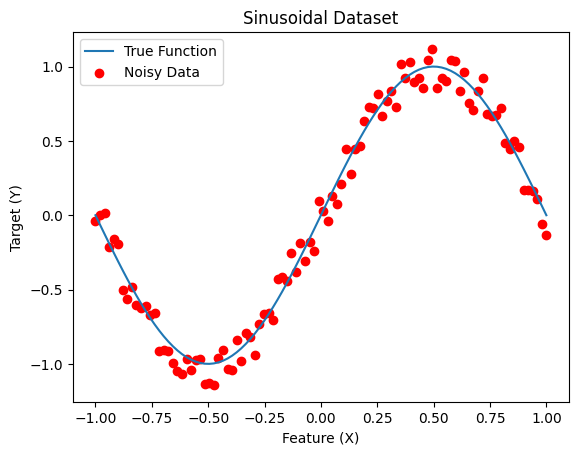

In [ ]:
# Generate sinusoidal data
num_points = 100  # Number of data points
x = np.linspace(-1, 1, num_points)  # Equally spaced points between `-1` and `1`
y_actual = np.sin(math.pi * x)  # True sinusoidal function
noise = 0.3 * (np.random.rand(num_points) - 0.5)  # Random noise in `[-0.15, 0.15]`
y_noisy = y_actual + noise  # Add noise to the true values

# Plot the dataset
plt.plot(x, y_actual, label='True Function')  # Plot the true sinusoidal function
plt.scatter(x, y_noisy, label='Noisy Data', color='red')  # Scatter plot for noisy data
plt.xlabel('Feature (X)')  # Label for x-axis
plt.ylabel('Target (Y)')  # Label for y-axis
plt.legend()  # Add a legend
plt.title('Sinusoidal Dataset')  # Title of the plot
plt.show()  # Display the plot

---

<a id="Custom-Fit-Bases"></a>
## Custom Fit with Variable Bases

We fit the data using polynomials of varying degrees.

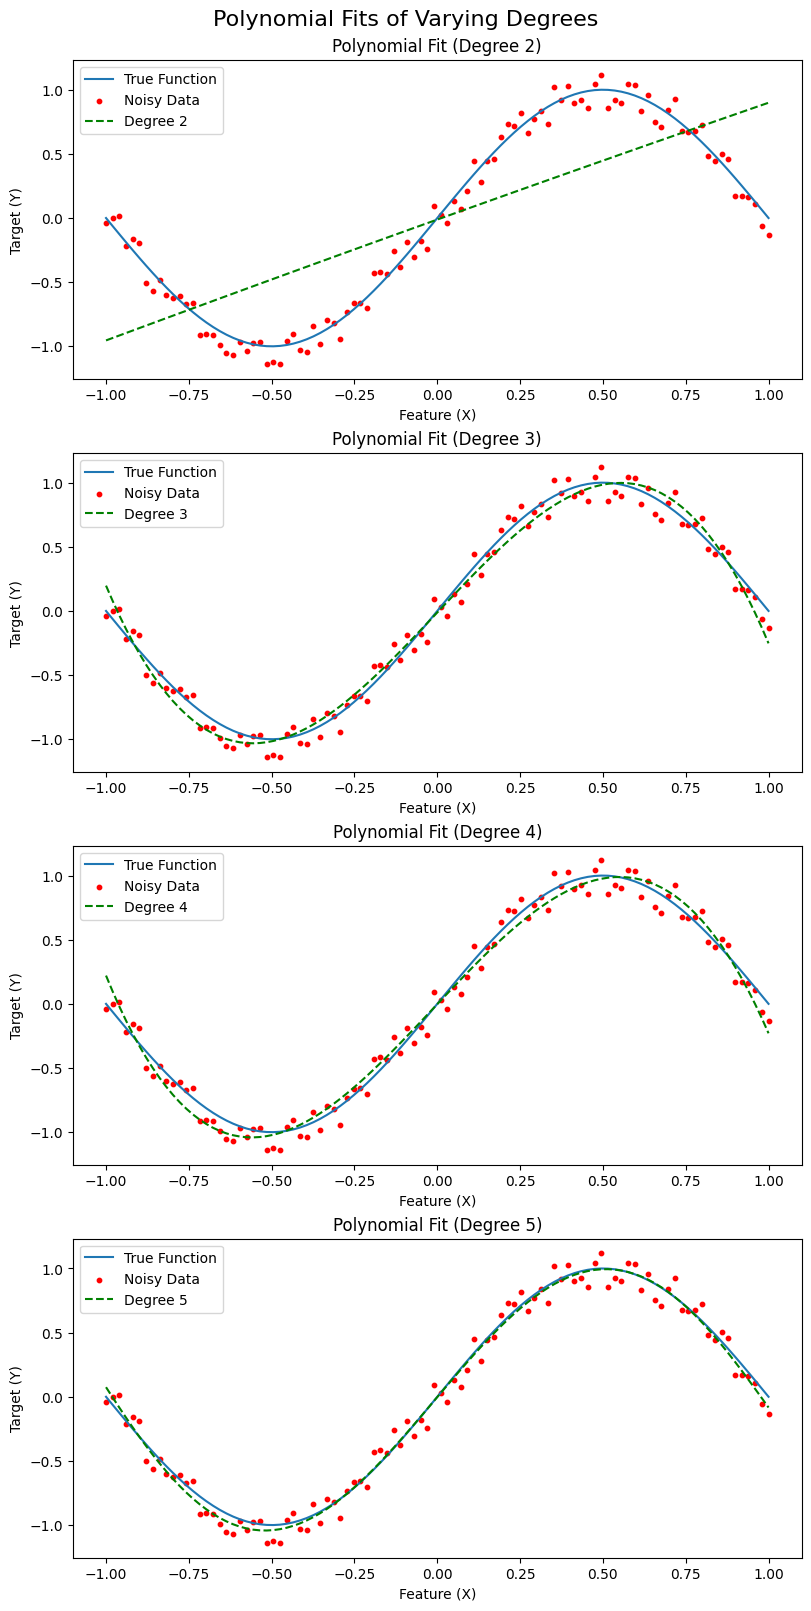

In [ ]:
# Fit polynomial models of varying degrees

# Polynomial fitting range
min_degree = ??  # Start fitting from this polynomial degree
max_degree = ??  # Fit up to this polynomial degree

# Ensure valid inputs
assert min_degree >= 1, "Minimum degree must be at least 1"
assert min_degree <= max_degree, "Minimum degree must not exceed maximum degree"

# Number of subplots needed
num_subplots = max_degree - min_degree + 1

# Create vertically stacked subplots
fig, axes = plt.subplots(num_subplots, 1, figsize=(8, 4 * num_subplots), constrained_layout=True)

# Loop through each polynomial degree
for degree, ax in zip(range(min_degree, max_degree + 1), axes):
    # Generate polynomial features
    X_poly = np.vstack([x**d for d in range(degree + 1)]).T

    # Fit the model using the normal equation
    w = np.linalg.inv(X_poly.T @ X_poly) @ X_poly.T @ y_noisy
    y_pred = ?? @ ??  # Predicted values

    # Plot on the corresponding subplot
    ax.plot(x, y_actual, label='True Function')  # True function
    ax.scatter(x, y_noisy, color='red', s=10, label='Noisy Data')  # Noisy data
    ax.plot(x, y_pred, linestyle='--', color='green', label=f'Degree {degree}')  # Fitted polynomial

    # Set subplot titles and labels
    ax.set_title(f'Polynomial Fit (Degree {degree})', fontsize=12)
    ax.set_xlabel('Feature (X)')
    ax.set_ylabel('Target (Y)')
    ax.legend()

# Add a main title for the figure
plt.suptitle('Polynomial Fits of Varying Degrees', fontsize=16)
plt.show()

## Explanation: Vertically Stacked Subplots for Polynomial Fits

### Overview
This code fits polynomials of varying degrees and visualizes results in **vertically stacked subplots**, where each subplot corresponds to a specific degree.

### Steps:
1. **Subplots Creation**:
   `plt.subplots(num_subplots, 1, figsize=(8, 4*num_subplots), constrained_layout=True)`
   - **`num_subplots`**: Determines the number of rows. It's calculated as `max_degree - min_degree + 1`, so that we have one row for each polynomial degree being fitted.
   - **`ncols=1`**: Indicates a single column of subplots, stacking them vertically.
   - **`figsize=(8, 4*num_subplots)`**: Controls the overall size of the figure.
     - The first value (`8`) is the width of the figure in inches.
     - The second value (`4*num_subplots`) adjusts the height dynamically based on the number of rows. Each row gets `4` inches of vertical space.
     - This ensures that each subplot has enough room for titles, labels, and legends without crowding.
   - **`constrained_layout=True`**: Automatically adjusts spacing between subplots to avoid overlap of elements like axis labels, titles, or legends.

2. **Iterate Through Degrees**:
   `for degree, ax in zip(range(min_degree, max_degree+1), axes):`
   - **`zip`**:
     - Combines two iterables (in this case, `range(min_degree, max_degree+1)` and `axes`) into pairs, allowing simultaneous iteration.
     - `range(min_degree, max_degree+1)` generates the polynomial degrees to be fitted (e.g., `[2, 3, 4, 5]` if `min_degree=2` and `max_degree=5`).
     - `axes` is the list of subplot axes created by `plt.subplots`. Each axis corresponds to one subplot.
     - `zip` pairs each degree with its corresponding axis. For example:
       - `degree=2` is paired with the first subplot axis.
       - `degree=3` is paired with the second subplot axis.
       - This ensures that each degree’s plot is drawn in the correct subplot.

3. **Plot for Each Degree**:
   - `ax.plot`: Draws the true function (`y_actual`) and the fitted polynomial curve (`y_pred`) for the current degree.
   - `ax.scatter`: Plots the noisy data points (`y_noisy`) on the same axis.
   - Each `ax` refers to a specific subplot, so all plotting commands target the correct subplot.

4. **Customize Subplots**:
   - `ax.set_title`, `ax.set_xlabel`, `ax.set_ylabel`: Add a title, x-axis label, and y-axis label to each subplot for clarity.
   - `ax.legend`: Displays a legend in each subplot to identify the curves and points.

5. **Main Title**:
   `plt.suptitle('Polynomial Fits of Varying Degrees', fontsize=16)`
   - Adds a global title across all subplots, summarizing the entire figure.

6. **Show Plot**:
   `plt.show()`: Renders the final stacked subplots with appropriate spacing and layout.

### Example:
For `min_degree=2` and `max_degree=5`:
- **`num_subplots=4`**: The figure has 4 subplots stacked vertically, one for each degree (2, 3, 4, 5).
- Each subplot is proportional in height (`4 inches each`), ensuring a clear and professional layout.

---

<a id="Summary"></a>
# Summary

- Implemented linear regression from scratch using `NumPy`.
- Demonstrated linear regression with `Scikit-Learn`.
- Created and fitted complex sinusoidal data using polynomial regression.
- Visualized results to compare true functions, noisy data, and fitted models.